In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
df=pd.read_csv("access to github.csv")

del df['Unnamed: 0']
df.head()

,build_token,origin,provider,ref,schema,spec,status,timestamp,version,python_logger
0,1.0,gke.mybinder.org,GitHub,836c546b6f09c7a1ed5c48de0f4d7fb2abdc840a,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 17:59:00+00:00,5.0,NaN
1,1.0,gesis.mybinder.org,GitHub,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 18:37:00+00:00,5.0,NaN
2,1.0,gke.mybinder.org,GitHub,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 19:09:00+00:00,5.0,NaN
3,1.0,gke.mybinder.org,GitHub,84c5f24631dd042cc321159e3c04b2e3827e0180,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 21:02:00+00:00,5.0,NaN
4,1.0,gke.mybinder.org,GitHub,84c5f24631dd042cc321159e3c04b2e3827e0180,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 21:25:00+00:00,5.0,NaN


In [2]:
df

,build_token,origin,provider,ref,schema,spec,status,timestamp,version,python_logger
0,1.0,gke.mybinder.org,GitHub,836c546b6f09c7a1ed5c48de0f4d7fb2abdc840a,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 17:59:00+00:00,5.0,NaN
1,1.0,gesis.mybinder.org,GitHub,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 18:37:00+00:00,5.0,NaN
2,1.0,gke.mybinder.org,GitHub,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 19:09:00+00:00,5.0,NaN
3,1.0,gke.mybinder.org,GitHub,84c5f24631dd042cc321159e3c04b2e3827e0180,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 21:02:00+00:00,5.0,NaN
4,1.0,gke.mybinder.org,GitHub,84c5f24631dd042cc321159e3c04b2e3827e0180,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 21:25:00+00:00,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2499,1.0,ovh2.mybinder.org,GitHub,1daa85c252f8a21f9b4d69609499786acc9d1d0d,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-12-10 20:06:00+00:00,5.0,NaN
2500,1.0,ovh2.mybinder.org,GitHub,1daa85c252f8a21f9b4d69609499786acc9d1d0d,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-12-12 00:34:00+00:00,5.0,NaN
2501,1.0,ovh2.mybinder.org,GitHub,1daa85c252f8a21f9b4d69609499786acc9d1d0d,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-12-12 13:09:00+00:00,5.0,NaN
2502,1.0,ovh2.mybinder.org,GitHub,1daa85c252f8a21f9b4d69609499786acc9d1d0d,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-12-12 22:49:00+00:00,5.0,NaN


In [3]:
i=0
date_time_list=[]
while i<len(df['timestamp']):
    date_time_list.append(df['timestamp'][i][:10])
    
    i=i+1
    if i%600==0:
        print(i)
dt=pd.to_datetime(date_time_list)
df['dt']=dt

df=df[['dt','version']]
df.head(5)

600
1200
1800
2400


,dt,version
0,2022-02-01,5.0
1,2022-02-01,5.0
2,2022-02-01,5.0
3,2022-02-01,5.0
4,2022-02-01,5.0


In [4]:
value_counts=df.value_counts().to_list()
value_counts
dt_list=df['dt'].value_counts().index.to_list()
df2=pd.DataFrame()
df2['dt']=dt_list
df2['count']=value_counts
df2.sort_values(by='dt',inplace=True)

In [5]:
pd.to_datetime('2022-01-25')

Timestamp('2022-01-25 00:00:00')

In [6]:
r = pd.date_range(start=pd.to_datetime('2022-01-25'), end=df2.dt.max())
df2.set_index('dt')
df=df2.reindex(r,fill_value=0)


In [7]:
df.head()

,dt,count
2022-01-25,0,0
2022-01-26,0,0
2022-01-27,0,0
2022-01-28,0,0
2022-01-29,0,0


In [8]:
count_list=[]
for i in df.index.to_list():
    if i in dt_list:
        count_list.append(value_counts[dt_list.index(i)])
    else:
        count_list.append(0)
        
df['count']=count_list
df.head()

x1=df['count'].loc[:'2022-06-01'].copy()
x2=df['count'].loc['2022-08-15':].copy()

In [9]:
fall_months=['2022-09-01','2022-10-01','2022-11-01','2022-12-01']
fall_months_dt=[pd.to_datetime(i) for i in fall_months]
spring_months=['2022-02-01','2022-03-01','2022-04-01','2022-05-01','2022-06-01']
spring_months_dt=[pd.to_datetime(i) for i in spring_months]

hw_fall_days=['2022-09-06','2022-09-19','2022-09-28','2022-10-17','2022-10-26','2022-11-06']
hw_fall_days_dt=[pd.to_datetime(i) for i in hw_fall_days]

hw_spring_days=['2022-02-07','2022-02-14','2022-02-21',
                '2022-03-07','2022-03-28','2022-04-07',
                '2022-04-12','2022-05-02']
hw_spring_days_dt=[pd.to_datetime(i) for i in hw_spring_days]


hw_spring_extensions=['2022-03-31','2022-05-04']
hw_spring_extensions_dt=[pd.to_datetime(i) for i in hw_spring_extensions]


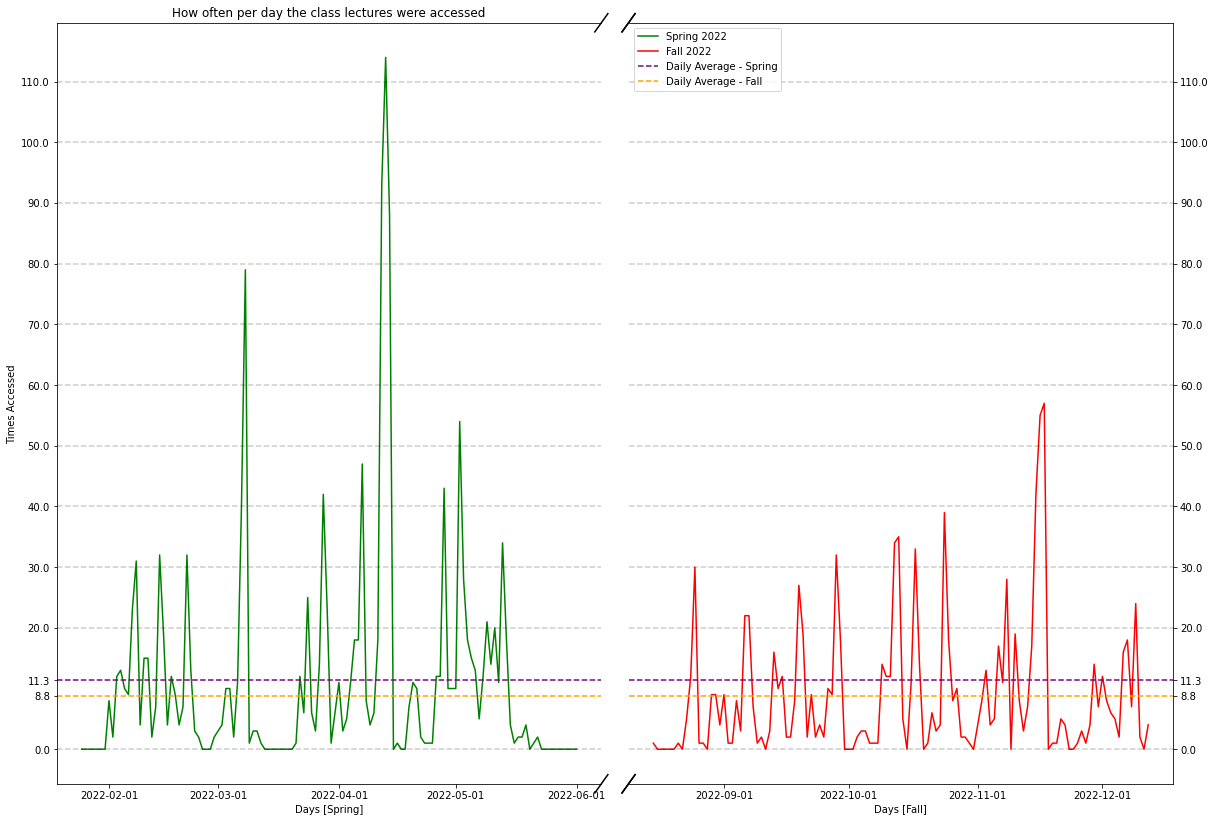

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, (ax,ax2) = plt.subplots(1,2,figsize=(20,14),sharey=True)
ax.plot(x1.index.to_list(),x1.to_list(),label="Spring 2022",color="green")
ax2.plot(color='green',label="Spring 2022")
ax2.plot(x2.index.to_list(),x2.to_list(),label="Fall 2022",color="red")


ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

z = .012 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-z,1+z), (-z,+z), **kwargs)
ax.plot((1-z,1+z),(1-z,1+z), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-z,+z), (1-z,1+z), **kwargs)
ax2.plot((-z,+z), (-z,+z), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-z,+z), (1-z,1+z), **kwargs)
ax2.plot((-z,+z), (-z,+z), **kwargs)

fig.subplots_adjust(wspace = 0.05)

#spring avg
ax2.axhline(y=x1.mean(),color="purple", label='Daily Average - Spring',linestyle='--' )
ax.axhline(y=x1.mean(),color="purple", linestyle='--' )

#fall avg
ax2.axhline(y=x2.mean(),color="orange", label='Daily Average - Fall ',linestyle='--' )
ax.axhline(y=x2.mean(),color="orange", linestyle='--' )

#guidelines
for i in range(0,120,10):
    if i==10:
        continue
    ax.axhline(y=i,color="black",linestyle="--",alpha=.2)
    ax2.axhline(y=i,color="black",linestyle="--",alpha=.2)
#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(handles=handles,loc='upper left')

ax.set_xlabel('Days [Spring]')        
ax2.set_xlabel('Days [Fall]')   
ax.set_ylabel('Times Accessed')

#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(handles=handles,loc='upper left')

ax.set_title('How often per day the class lectures were accessed')
ax2.set_xticks(fall_months)
ax.set_xticks(spring_months)


Ytick=[0,x2.mean(),x1.mean()]
Ytick.extend(list(range(20,120,10)))
ax.set_yticks(Ytick)
ax2.set_yticks(Ytick)

ax.set_xlabel('Days [Spring]')        
ax2.set_xlabel('Days [Fall]')   
ax.set_ylabel('Times Accessed')

plt.savefig("Class Binder Access - Chart 1.jpg",bbox_inches='tight',dpi=400)
plt.show()

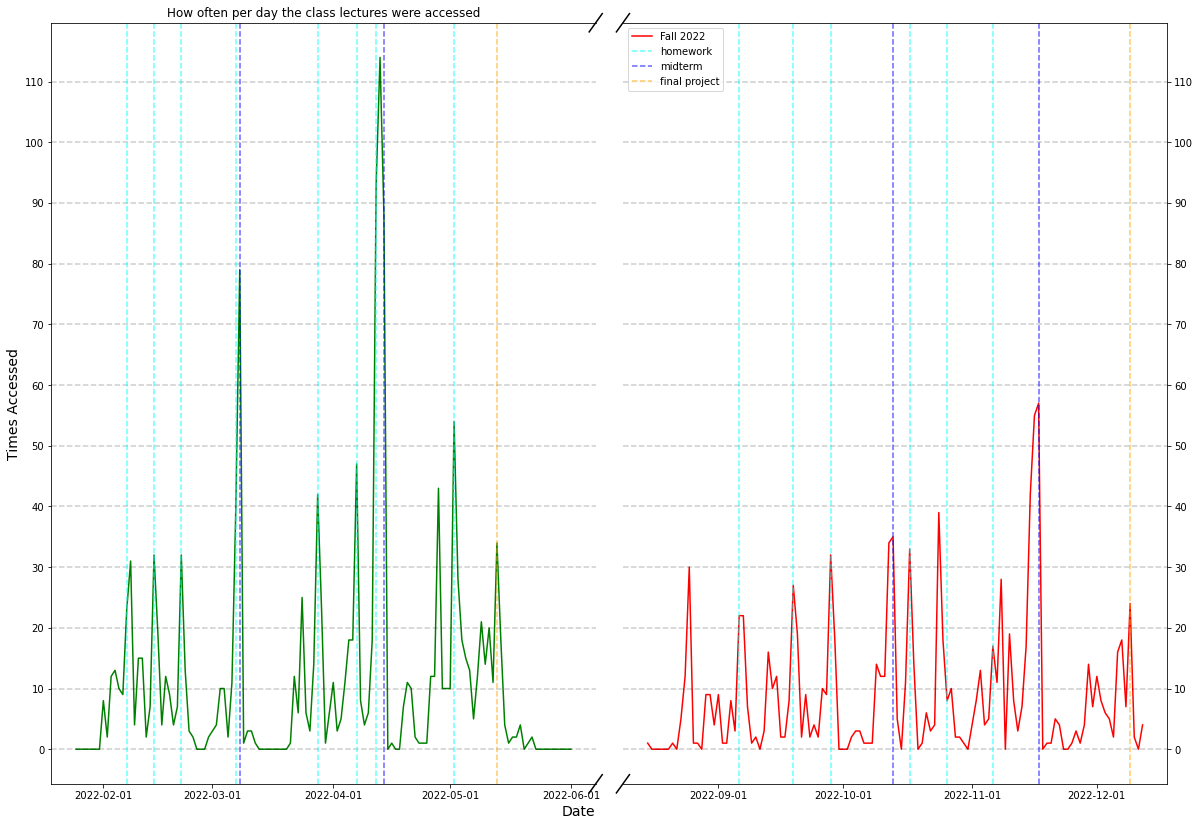

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, (ax,ax2) = plt.subplots(1,2,figsize=(20,14),sharey=True,sharex=False)
ax.plot(x1.index.to_list(),x1.to_list(),label="Spring 2022",color="green")
ax2.plot(color='green',label="Spring 2022")
ax2.plot(x2.index.to_list(),x2.to_list(),label="Fall 2022",color="red")


ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

z = .012 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-z,1+z), (-z,+z), **kwargs)
ax.plot((1-z,1+z),(1-z,1+z), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-z,+z), (1-z,1+z), **kwargs)
ax2.plot((-z,+z), (-z,+z), **kwargs)

fig.subplots_adjust(wspace = 0.05)



#guidelines
for i in range(0,120,10):
    ax.axhline(y=i,color="black",linestyle="--",alpha=.2)
    ax2.axhline(y=i,color="black",linestyle="--",alpha=.2)

ax.set_title('How often per day the class lectures were accessed')
ax.set_xticks(spring_months)
ax2.set_xticks(fall_months)
ax.set_yticks(list(range(0,120,10)))
ax2.set_yticks(list(range(0,120,10)))

#homework days

for i in hw_fall_days[1:]:
    ax2.axvline(x=pd.to_datetime(i), color='cyan',linestyle='--',alpha=.6)
ax2.axvline(x=pd.to_datetime(hw_fall_days[0]), color='cyan',linestyle='--',alpha=.6,label='homework')

for i in hw_spring_days[1:]:
    ax.axvline(x=pd.to_datetime(i), color='cyan',linestyle='--',alpha=.6)
ax.axvline(x=pd.to_datetime(hw_spring_days[0]), color='cyan',linestyle='--',alpha=.6,)

#Midterm Spring
ax.axvline(x=pd.to_datetime('2022-04-14'), color='blue',linestyle='--',alpha=.6,)
ax.axvline(x=pd.to_datetime('2022-03-08'), color='blue',linestyle='--',alpha=.6,)

#midterm Fall
ax2.axvline(x=pd.to_datetime('2022-10-13'), color='blue',linestyle='--',alpha=.6,label='midterm')
ax2.axvline(x=pd.to_datetime('2022-11-17'), color='blue',linestyle='--',alpha=.6,)

#final Projects
ax2.axvline(x=pd.to_datetime('2022-12-09'), color='orange',linestyle='--',alpha=.6,label="final project")#fall
ax.axvline(x=pd.to_datetime('2022-05-13'), color='orange',linestyle='--',alpha=.6,label="final project")#spring

#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(loc='upper left')

ax.set_xlabel("Date",loc='right',fontsize=14)
ax.set_ylabel("Times Accessed",fontsize=14)

plt.savefig("Class Binder Access - Chart 2.jpg",bbox_inches='tight',dpi=400)
plt.show()